In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np


# 비지도 학습
- Target이 없는 데이터를 분류하기 
- 군집화, 차원축소가 있음

---
# 군집알고리즘
- 과일 데이터 사진을 보고 사과, 파인애플, 바나나 3분류하기

In [3]:
# 과일 데이터 불러오기

fruits = np.load("../Data/fruits.npy")
fruits.shape # 300개의 이미지가 100 X 100 이미지로 들어있음

(300, 100, 100)

> 흑백 이미지  
> 300개의 이미지가 100 X 100 pixel로 구성  
> 100개는 사과 100개는 파인애플, 100개는 바나나  


In [4]:
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   4,   3,   2,   1,   0,   0,   0,
         0,   6,   1,   0,   4,   3,   0,   1,   8,  14,   0,   0,   4,
         8,  13,  13, 156, 191, 116,  30,   3,   0,   0,   3,   6,   2,
         1,   0,   0,   0,   0,   1,   4,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int32)

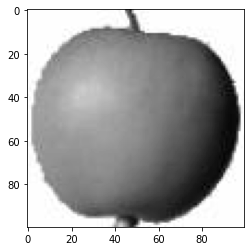

In [5]:
# 사과 이미지 보기 : 이미지로 확인하기
import matplotlib.pyplot as plt

plt.imshow(fruits[7], cmap='gray_r')

plt.show()

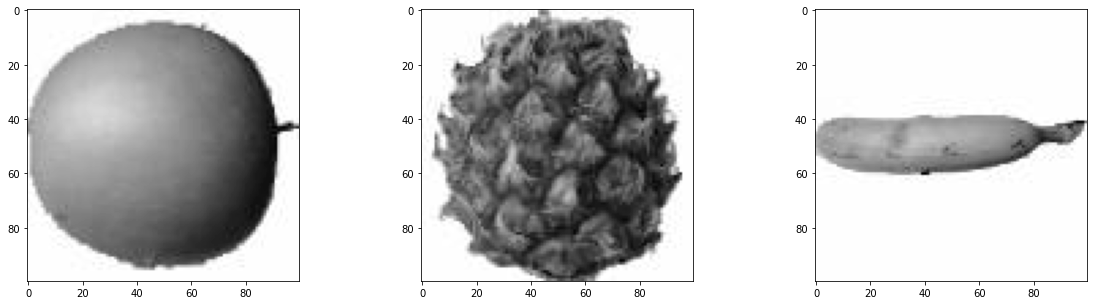

In [6]:
# 사과, 파인애플, 바나나 이미지를 나란히 보기
fig, axs = plt.subplots(1, 3, figsize= ( 20,5))
axs[0].imshow(fruits[15], cmap = 'gray_r')
axs[1].imshow(fruits[100], cmap = 'gray_r')
axs[2].imshow(fruits[200], cmap = 'gray_r')

### 샘플 차원 변경하기
- 현재 3차원의 배열을 분석을 위해 2차원 배열로 변경
- 배열 중 page단의 수는 apple, pineapple, banana로 분류하게 변경하기


In [7]:
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [8]:
apple.shape

(100, 10000)

In [9]:
apple[0:1].shape

(1, 10000)

In [10]:
### 픽셀값 분석하기

# apple의 sample별(행별) 평균 구하기

In [11]:
apple.mean(axis=1).mean()

93.10731800000002

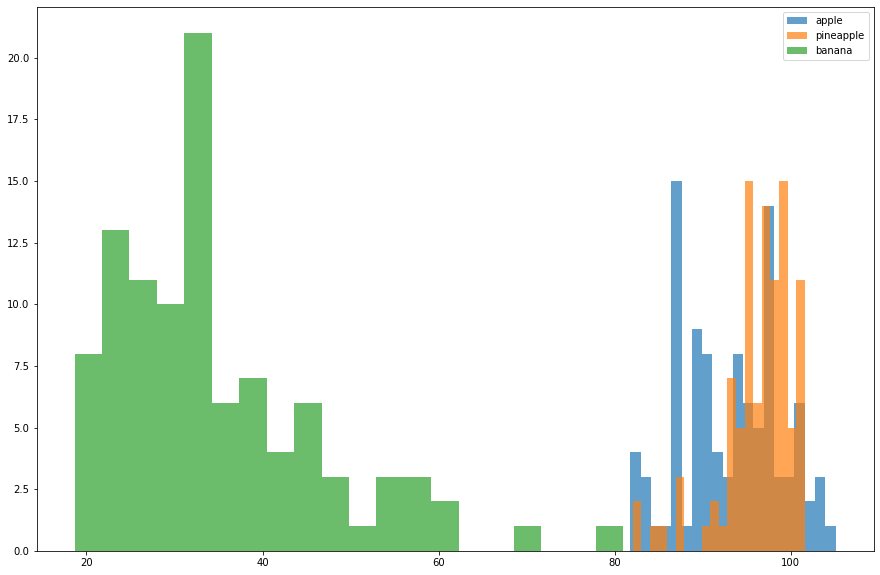

In [12]:
# 과일별(Sample별) 빈도수를 히스토그램으로 표현하기
plt.figure(figsize=(15,10))

plt.hist(np.mean(apple,axis=1),alpha = 0.7,bins = 20)
plt.hist(np.mean(pineapple,axis=1),alpha = 0.7, bins=20)
plt.hist(np.mean(banana,axis=1),alpha = 0.7,bins=20)
plt.legend(['apple','pineapple','banana'])
plt.show()

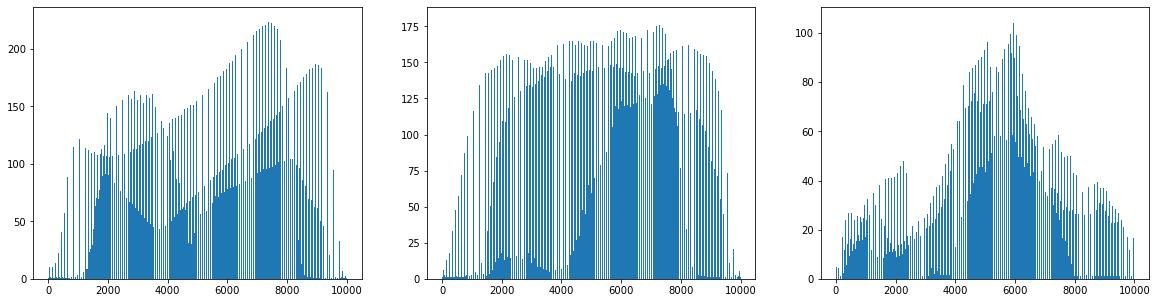

In [13]:
# Feature ( 픽셀별) 평균의 막대 그리기
fig,axs = plt.subplots(1, 3, figsize = (20,5))

axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()

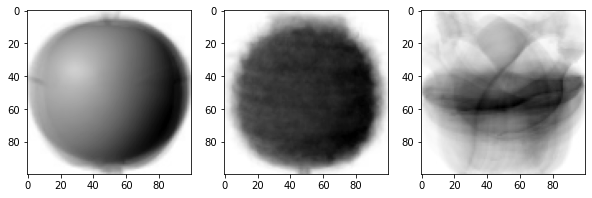

In [14]:
# 평균 이미지로 그림 표현학기 : 이미지로 그리기 위에 다시 2차원 배열로 변경한다.

apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

fig, axs= plt.subplots(1,3,figsize = (10,10))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

### 평균값과 가까운 사진 고르기
- 위에서 구한 평균 이미지와 각 샘플들의 픽셀값과 비교하여 가장 가까운 거리의 이미지는 해당 과일일 것이다.
- 사과만 잘 분류하는지 시도

In [15]:
abs_diff = np.abs(fruits - apple_mean) # 양수와 음수의 구분이 필요없으므로 절대값 사용
abs_mean = np.mean(abs_diff,axis=(1,2)) # abs_diff가 3차원이기때문에 page차원을 제외하고 행과 열만의 평균을 구한다.
abs_mean.shape # 300개의 원소로 이루어진 1차원 배열

(300,)

In [16]:
abs_mean

array([17.357734, 13.554336, 17.202008, 15.769808, 18.019082, 20.55447 ,
       16.803214, 16.124154, 19.59156 , 21.365726, 16.465608, 16.603126,
       13.41592 , 17.248916, 15.977246, 15.477304, 18.571426, 16.52309 ,
       27.595128, 19.7579  , 20.823426, 16.460124, 17.103872, 15.88027 ,
       15.058592, 19.361638, 24.031656, 14.786244, 19.27237 , 20.824594,
       14.814994, 18.677796, 15.906604, 13.10645 , 18.453898, 16.616742,
       16.327252, 18.969418, 13.913228, 16.51597 , 18.388472, 19.183942,
       29.117914, 18.440636, 28.192728, 21.463068, 19.732278, 15.57259 ,
       13.11697 , 18.756192, 14.416062, 21.528646, 26.231478, 15.918032,
       18.57341 , 16.42997 , 17.080708, 13.190102, 18.24878 , 13.520802,
       20.85775 , 16.882222, 22.814864, 19.030818, 19.13427 , 16.628244,
       14.860376, 19.391788, 14.828492, 14.48473 , 13.119974, 15.92342 ,
       20.417536, 16.248422, 13.734026, 18.429454, 15.216936, 16.411588,
       13.49728 , 20.012288, 17.256706, 21.156152, 

> abs_mean과 apple의 차이가 가장 적은 것으로 구분

In [17]:
# 300개의 데이터중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요 (arg.sort)

apple_index = np.argsort(abs_mean)[:100]

np.sum(apple_index <= 100)

100

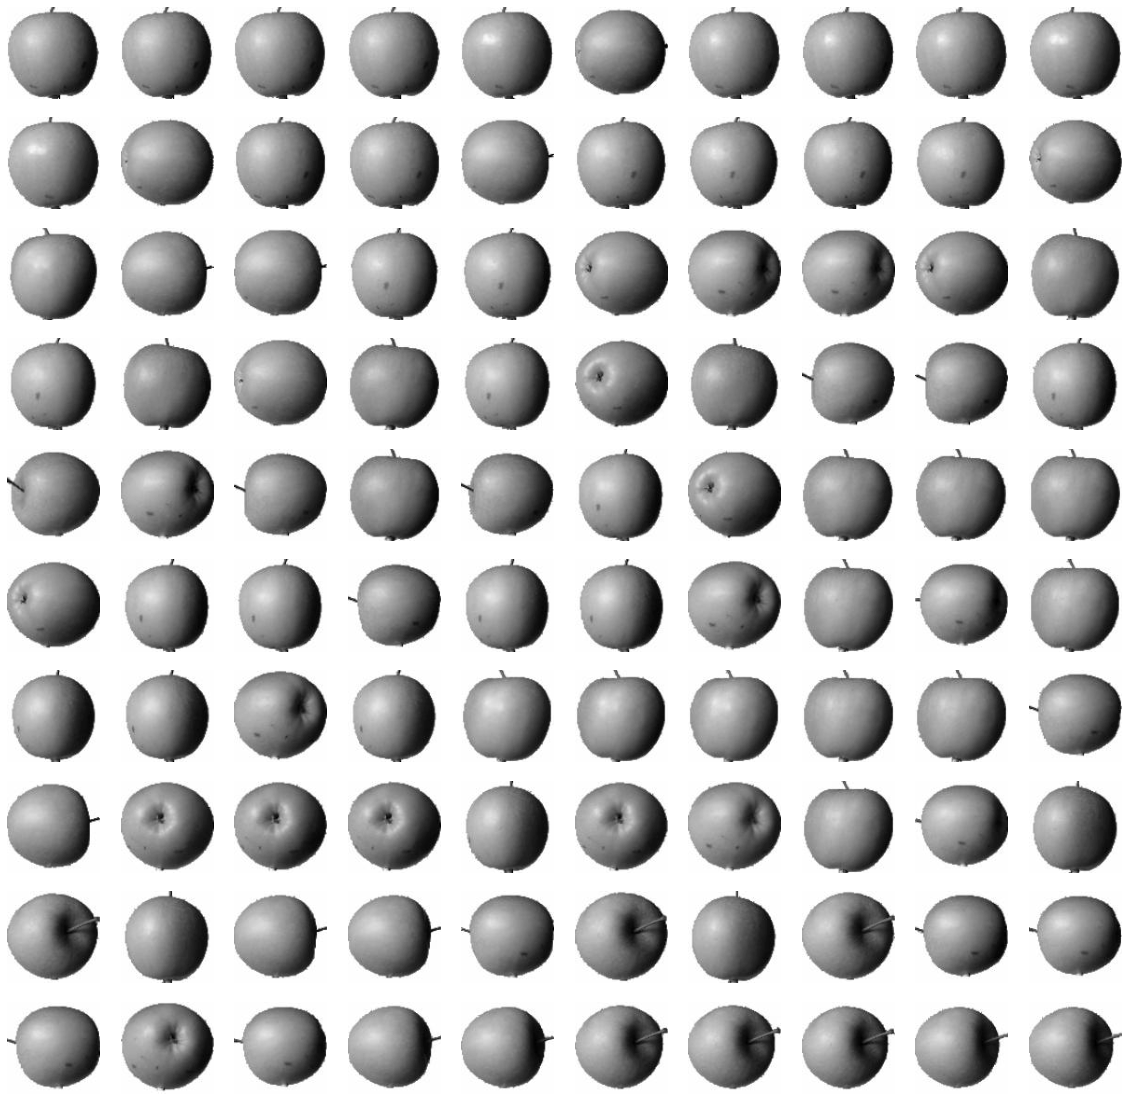

In [18]:
# 그림 그려보기
fig, axs = plt.subplots(10,10, figsize=(20,20))

for i in range(10):
    for j in range(10):

        axs[i][j].imshow(fruits[apple_index[i*10 + j]] , cmap='gray_r')
        axs[i][j].axis('off')

plt.show()

> 이와 같은 방법으로 비지도학습인 군집분류 알고리즘이 구성된다.

----
# 바나나로 확인해 보기

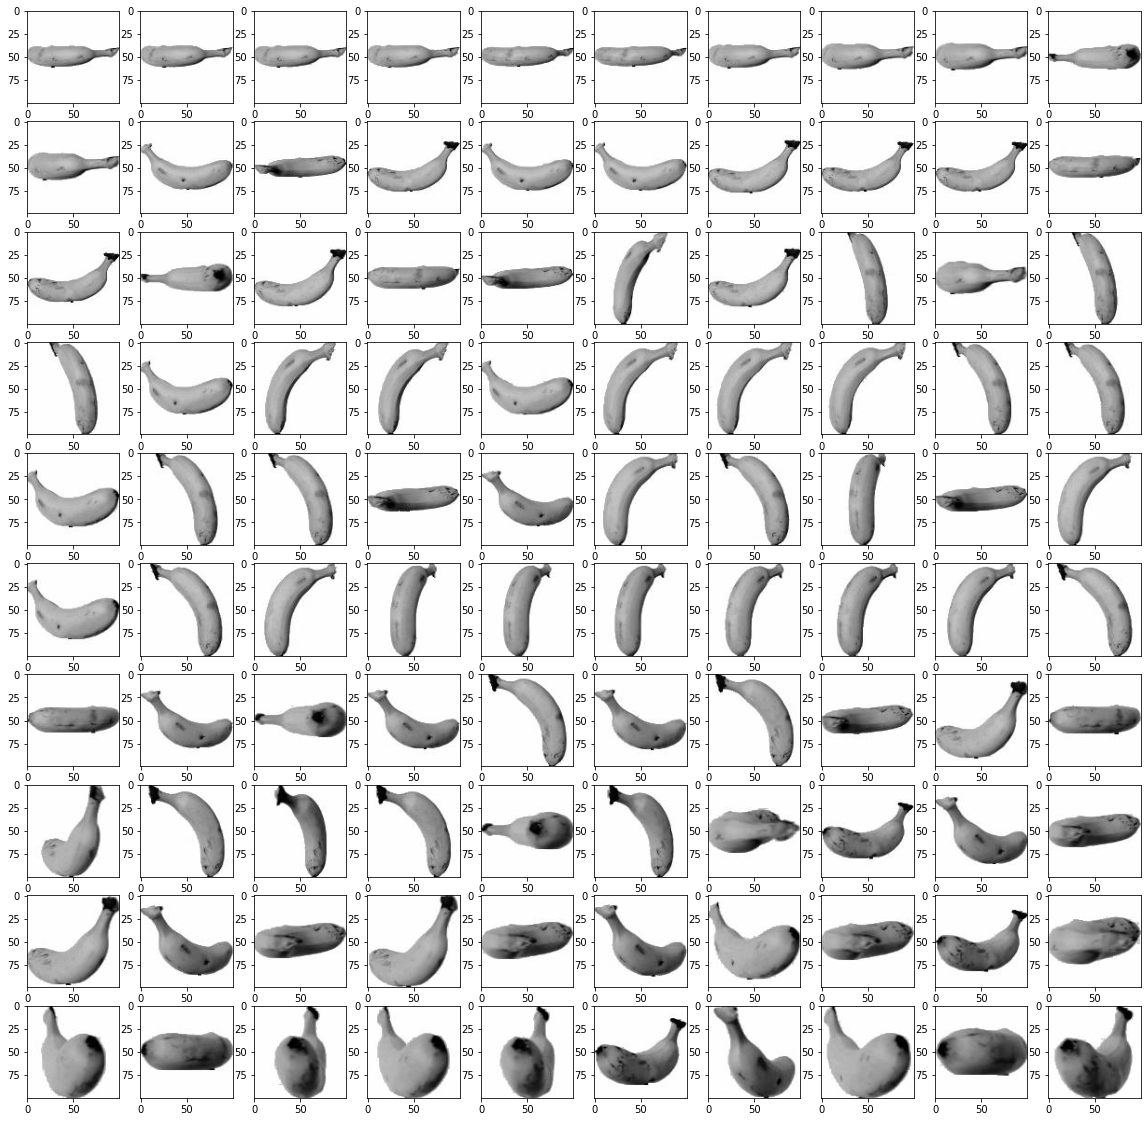

In [19]:
ba_diff  = (fruits - banana_mean)


ba_predimage = fruits[np.mean(ba_diff,axis=(1,2)).argsort()[:100]]

fig, axs = plt.subplots(10,10, figsize = (20,20))
for i in range(10):
    for j in range(10):
        axs[i][j].imshow(ba_predimage[10*i+j], cmap = 'gray_r')
plt.show()